In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
from keras.datasets import mnist, fashion_mnist
import numpy as np
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

autoencoder.fit(x_train, x_train,
                epochs=105,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

4422102/4422102 [==============================] - 0s 0us/step
Epoch 1/105
235/235 [==============================] - 12s 36ms/step - loss: 0.6947 - val_loss: 0.6946
Epoch 2/105
235/235 [==============================] - 4s 18ms/step - loss: 0.6945 - val_loss: 0.6944
Epoch 3/105
235/235 [==============================] - 3s 15ms/step - loss: 0.6943 - val_loss: 0.6942
Epoch 4/105
235/235 [==============================] - 3s 15ms/step - loss: 0.6941 - val_loss: 0.6941
Epoch 5/105
235/235 [==============================] - 5s 20ms/step - loss: 0.6940 - val_loss: 0.6939
Epoch 6/105
235/235 [==============================] - 3s 14ms/step - loss: 0.6938 - val_loss: 0.6937
Epoch 7/105
235/235 [==============================] - 3s 14ms/step - loss: 0.6936 - val_loss: 0.6936
Epoch 8/105
235/235 [==============================] - 4s 18ms/step - loss: 0.6935 - val_loss: 0.6934
Epoch 9/105
235/235 [==============================] - 4s 17ms/step - loss: 0.6933 - val_loss: 0.6933
Epoch 10/105
235/2

Epoch 1/105
235/235 [==============================] - 10s 38ms/step - loss: 0.6935 - accuracy: 7.5000e-04 - val_loss: 0.6935 - val_accuracy: 0.0010
Epoch 2/105
235/235 [==============================] - 8s 32ms/step - loss: 0.6934 - accuracy: 7.6667e-04 - val_loss: 0.6933 - val_accuracy: 0.0010
Epoch 3/105
235/235 [==============================] - 9s 38ms/step - loss: 0.6933 - accuracy: 7.6667e-04 - val_loss: 0.6932 - val_accuracy: 0.0010
Epoch 4/105
235/235 [==============================] - 7s 32ms/step - loss: 0.6931 - accuracy: 7.5000e-04 - val_loss: 0.6931 - val_accuracy: 0.0010
Epoch 5/105
235/235 [==============================] - 9s 39ms/step - loss: 0.6930 - accuracy: 7.3333e-04 - val_loss: 0.6930 - val_accuracy: 0.0010
Epoch 6/105
235/235 [==============================] - 9s 39ms/step - loss: 0.6929 - accuracy: 7.6667e-04 - val_loss: 0.6928 - val_accuracy: 0.0010
Epoch 7/105
235/235 [==============================] - 8s 32ms/step - loss: 0.6928 - accuracy: 7.8333e-04 - val

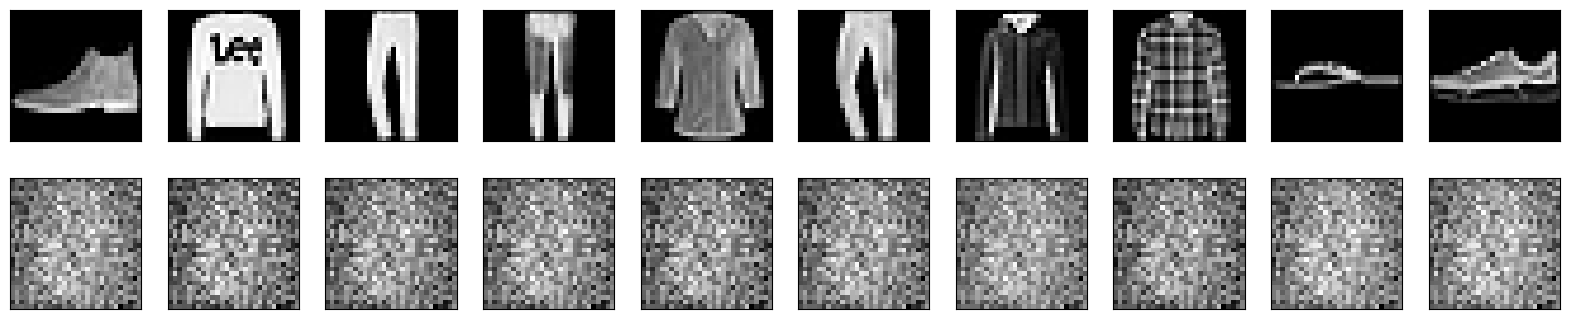

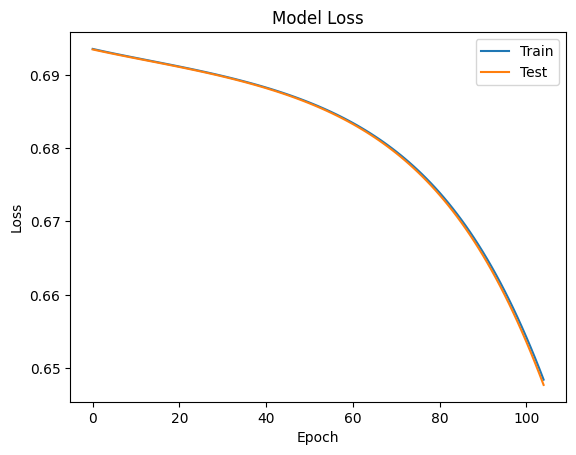

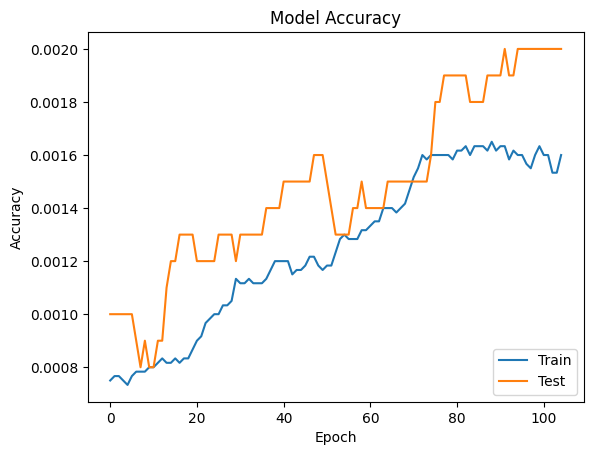

In [2]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import mnist, fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the encoder dimension
encoding_dim = 32

# Define the input placeholder
input_img = Input(shape=(784,))

# Define the first hidden layer
hidden_1 = Dense(256, activation='relu')(input_img)

# Define the second hidden layer
encoded = Dense(encoding_dim, activation='relu')(hidden_1)

# Define the first hidden layer of the decoder
hidden_2 = Dense(256, activation='relu')(encoded)

# Define the output layer
decoded = Dense(784, activation='sigmoid')(hidden_2)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy',metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                epochs=105,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Make predictions on the test data
decoded_imgs = autoencoder.predict(x_test)

# Visualize one of the reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original test image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed test image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot the loss and accuracy over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

Epoch 1/105
235/235 [==============================] - 7s 23ms/step - loss: 0.6942 - accuracy: 0.0013 - val_loss: 0.6941 - val_accuracy: 0.0014
Epoch 2/105
235/235 [==============================] - 4s 18ms/step - loss: 0.6940 - accuracy: 0.0013 - val_loss: 0.6939 - val_accuracy: 0.0011
Epoch 3/105
235/235 [==============================] - 5s 20ms/step - loss: 0.6937 - accuracy: 0.0013 - val_loss: 0.6936 - val_accuracy: 0.0011
Epoch 4/105
235/235 [==============================] - 4s 15ms/step - loss: 0.6935 - accuracy: 0.0014 - val_loss: 0.6934 - val_accuracy: 0.0011
Epoch 5/105
235/235 [==============================] - 3s 15ms/step - loss: 0.6933 - accuracy: 0.0014 - val_loss: 0.6932 - val_accuracy: 0.0013
Epoch 6/105
235/235 [==============================] - 5s 21ms/step - loss: 0.6931 - accuracy: 0.0015 - val_loss: 0.6930 - val_accuracy: 0.0015
Epoch 7/105
235/235 [==============================] - 4s 16ms/step - loss: 0.6929 - accuracy: 0.0016 - val_loss: 0.6928 - val_accuracy:

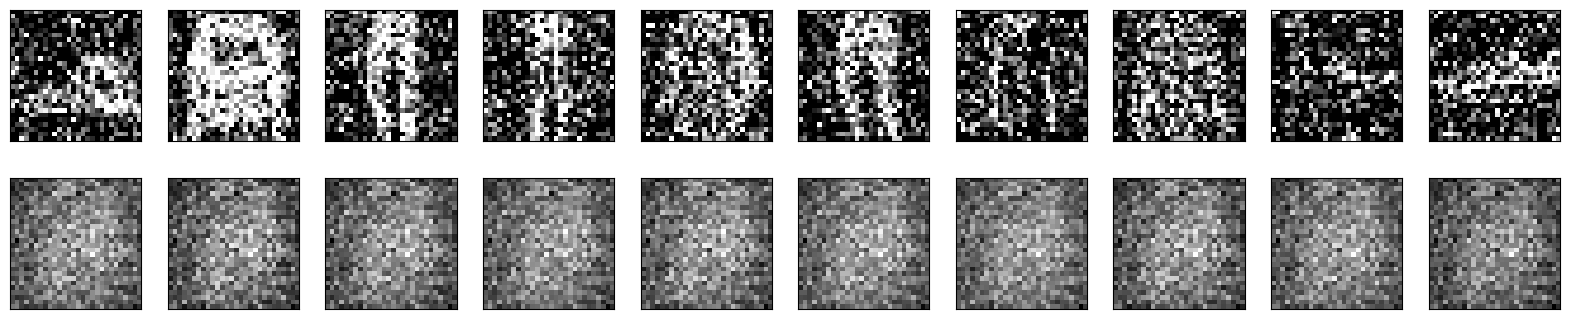

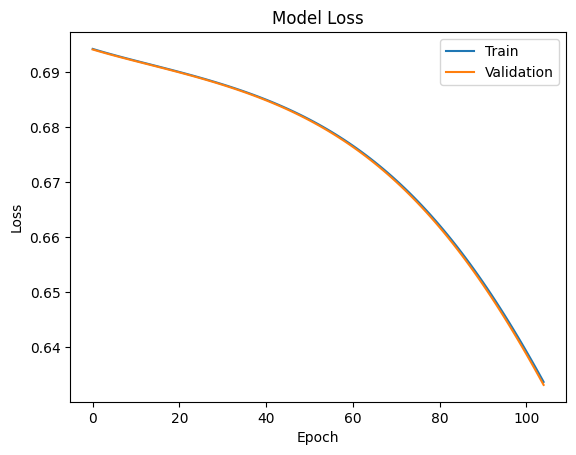

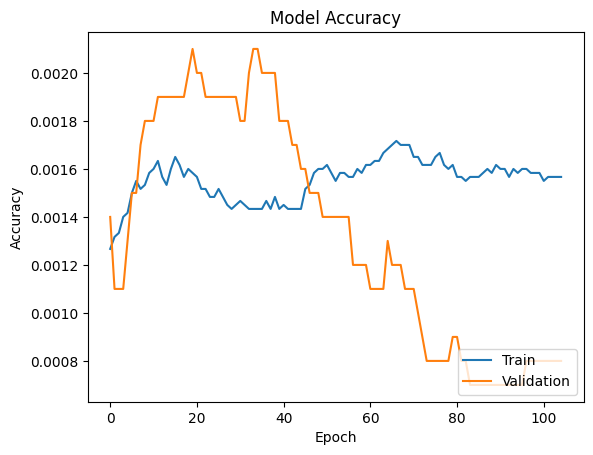

In [3]:
from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

# Define the encoder dimension
encoding_dim = 32

# Define the input placeholder
input_img = Input(shape=(784,))

# Define the encoder layer
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Define the decoder layer
decoded = Dense(784, activation='sigmoid')(encoded)

# Define the autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the model
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])

# Load the fashion MNIST dataset
(x_train, _), (x_test, _) = fashion_mnist.load_data()

# Normalize the data and flatten the images
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Add noise to the training and test data
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

# Ensure the noisy data is still within the valid range
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Train the autoencoder
history = autoencoder.fit(x_train_noisy, x_train,
                epochs=105,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Generate reconstructed images from the noisy test data
decoded_imgs = autoencoder.predict(x_test_noisy)

# Visualize noisy and reconstructed test images
plt.figure(figsize=(20, 4))
n = 10
for i in range(n):
    # Display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Plot the loss over time
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Plot the accuracy over time
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()